In [11]:
import pandas as pd 
import numpy as np

# Load Data

In [12]:
url = 'https://raw.githubusercontent.com/rrofiikkk/machine-learning/refs/heads/main/german_credit_data.csv'
df = pd.read_csv(url)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [13]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [14]:
df = df.drop(columns=['Unnamed: 0'])
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


# Data Understanding

In [15]:
for i in df.columns:
    print(i,": ", df[i].unique(), "\n")

Age :  [67 22 49 45 53 35 61 28 25 24 60 32 44 31 48 26 36 39 42 34 63 27 30 57
 33 37 58 23 29 52 50 46 51 41 40 66 47 56 54 20 21 38 70 65 74 68 43 55
 64 75 19 62 59] 

Sex :  ['male' 'female'] 

Job :  [2 1 3 0] 

Housing :  ['own' 'free' 'rent'] 

Saving accounts :  [nan 'little' 'quite rich' 'rich' 'moderate'] 

Checking account :  ['little' 'moderate' nan 'rich'] 

Credit amount :  [ 1169  5951  2096  7882  4870  9055  2835  6948  3059  5234  1295  4308
  1567  1199  1403  1282  2424  8072 12579  3430  2134  2647  2241  1804
  2069  1374   426   409  2415  6836  1913  4020  5866  1264  1474  4746
  6110  2100  1225   458  2333  1158  6204  6187  6143  1393  2299  1352
  7228  2073  5965  1262  3378  2225   783  6468  9566  1961  6229  1391
  1537  1953 14421  3181  5190  2171  1007  1819  2394  8133   730  1164
  5954  1977  1526  3965  4771  9436  3832  5943  1213  1568  1755  2315
  1412 12612  2249  1108   618  1409   797  3617  1318 15945  2012  2622
  2337  7057  1469  2323

1. Age: Usia pemohon (dalam tahun), contoh: 22, 45, 67
2. Sex: Jenis kelamin, nilai: 'male', 'female'
3. Job: Level pekerjaan (0–3), misal: 0 = pengangguran, 3 = pekerjaan bagus
4. Housing: Status tempat tinggal: 'own', 'rent', 'free'
5. Saving accounts: Tabungan nasabah: 'little', 'moderate', 'rich', 'quite rich', atau nan jika kosong
6. Checking account: Saldo rekening giro: 'little', 'moderate', 'rich', atau nan
7. Credit amount: Jumlah kredit/pinjaman yang diminta, contoh: 1169, 4870
8. Purpose: Tujuan pinjaman: 'car', 'education', 'business', 'radio/TV', dll.
9. Risk: Penilaian kredit: good= bagus, bad= jelek.

In [16]:
df.columns = df.columns.str.lower().str.replace(" ", "_")
df.columns

Index(['age', 'sex', 'job', 'housing', 'saving_accounts', 'checking_account',
       'credit_amount', 'duration', 'purpose', 'risk'],
      dtype='object')

In [18]:
cat = ['sex', 'job', 'housing', 'saving_accounts', "checking_account", "risk"]
num = ["age", "credit_amount"]

# Exploratory Data Anlysis

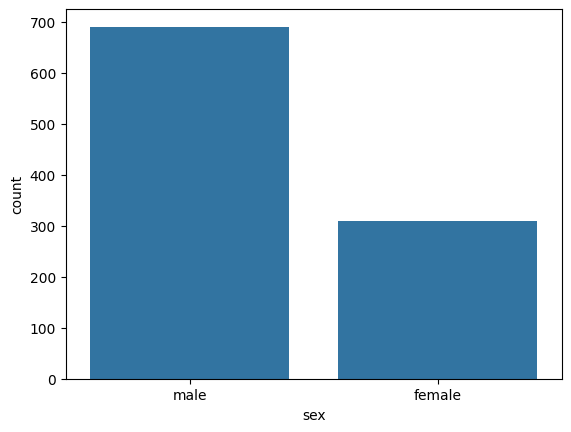

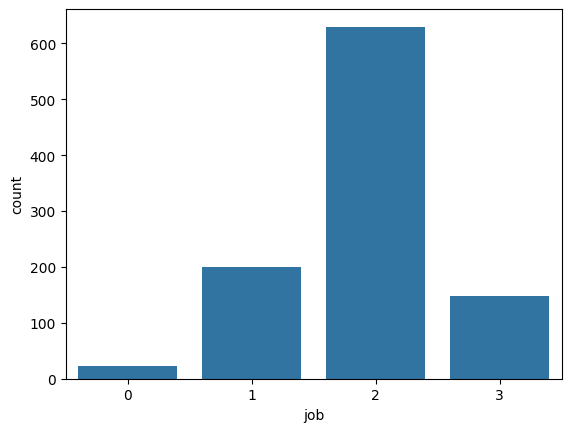

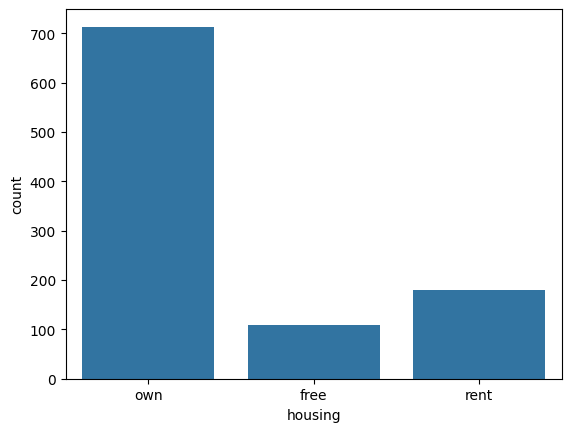

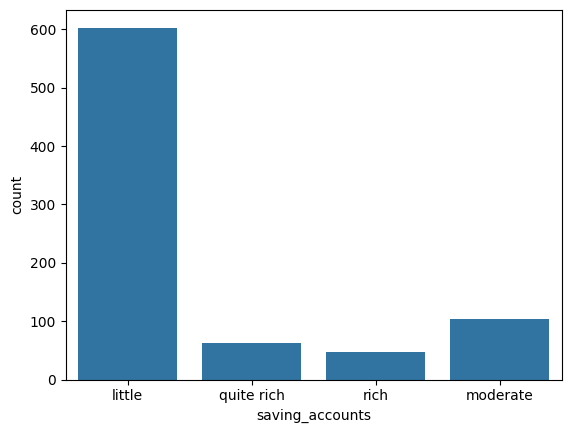

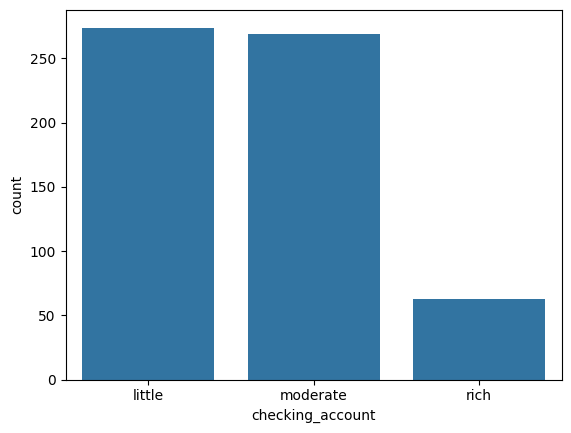

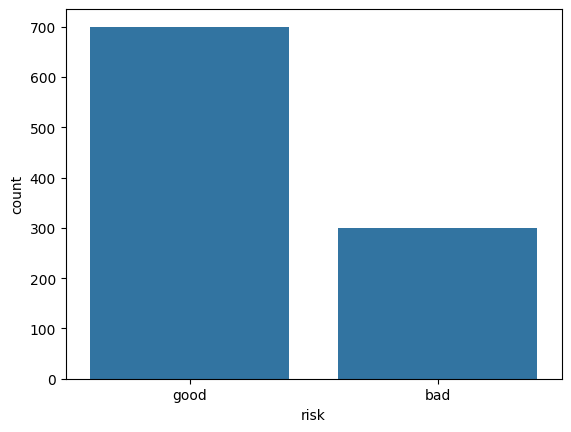

In [19]:
import matplotlib.pyplot as plt 
import seaborn as sns 

for i in cat:
    sns.countplot(x=i, data=df)
    plt.show()

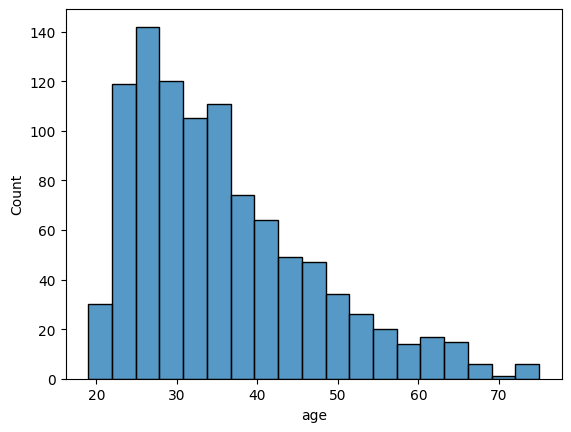

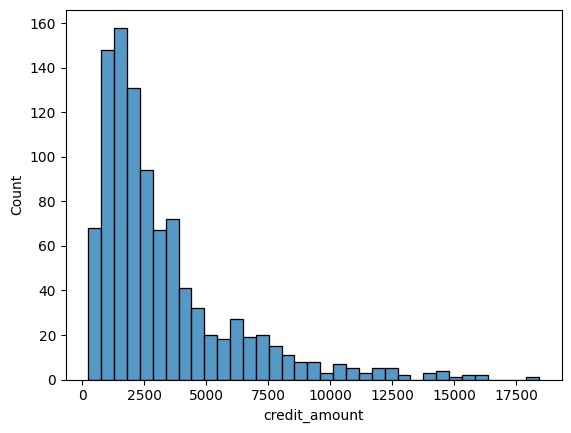

In [20]:
for i in num:
    sns.histplot(x=i, data=df)
    plt.show()

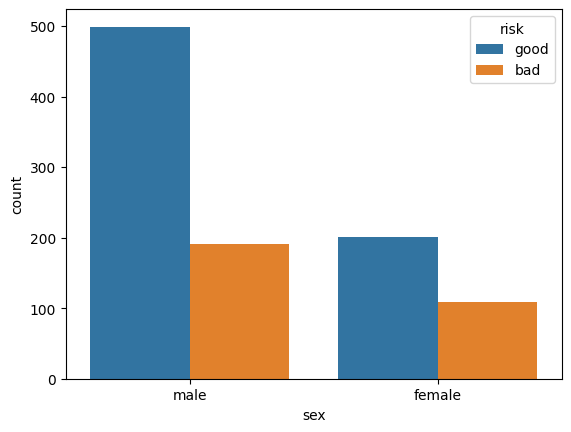

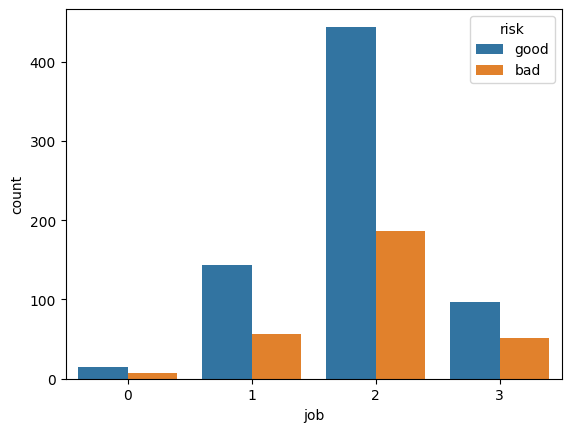

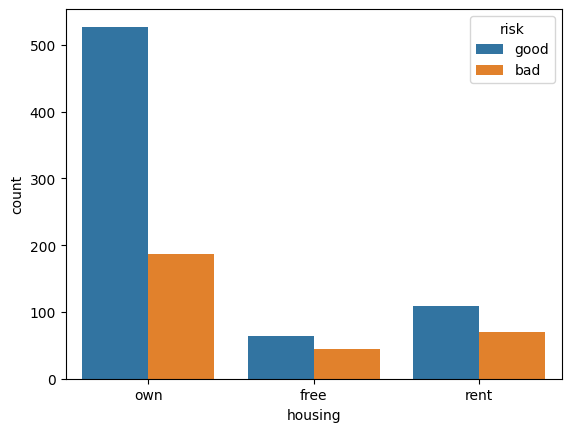

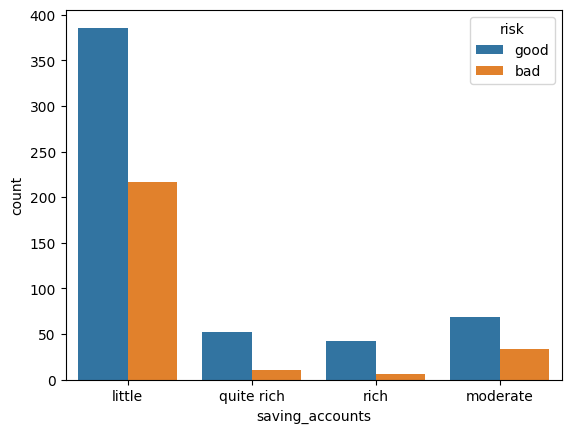

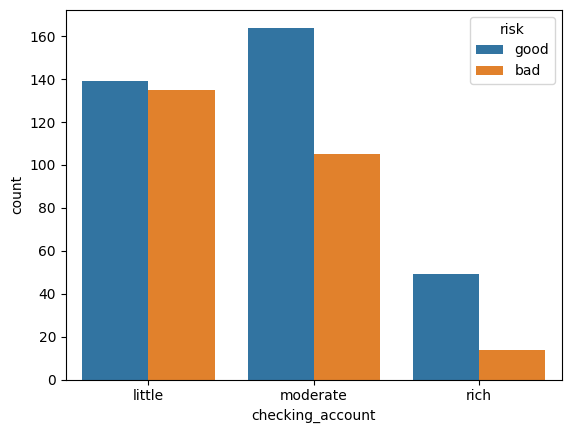

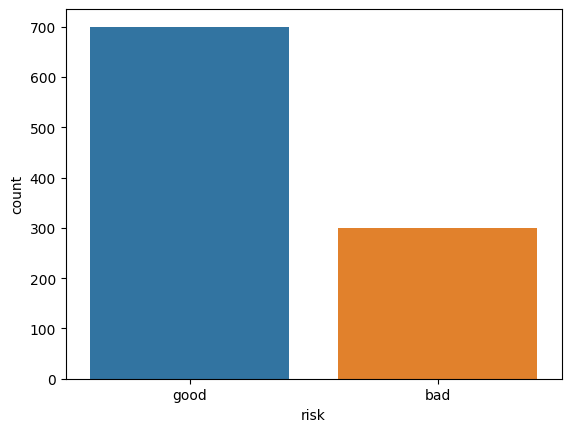

In [21]:
for i in cat:
    sns.countplot(x=i, hue='risk', data=df)
    plt.show()

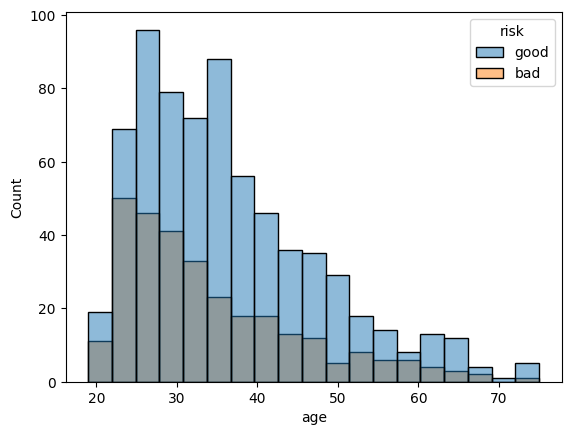

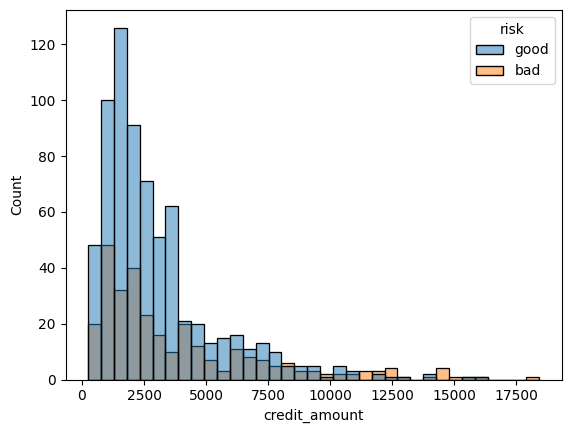

In [22]:
for i in num:
    sns.histplot(x=i, hue='risk',data=df)
    plt.show()

In [30]:
total = df.isna().sum()
tot =((total/1000)*100)
tot

age                  0.0
sex                  0.0
job                  0.0
housing              0.0
saving_accounts     18.3
checking_account    39.4
credit_amount        0.0
duration             0.0
purpose              0.0
risk                 0.0
dtype: float64

In [31]:
df['risk'].value_counts()

risk
good    700
bad     300
Name: count, dtype: int64